In [34]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('disulfides.csv')
print len(df)


ss_dict      = {}
ss_dict['H'] = 'a-Helix'
ss_dict['B'] = 'B-Bridge'
ss_dict['E'] = 'Strand'
ss_dict['G'] = '3-Helix'
ss_dict['I'] = '5-Helix'
ss_dict['T'] = 'Turn'
ss_dict['S'] = 'Bend'
ss_dict['C'] = 'Coil'

def classify_ss(ss):
    try:
        ss_category = ss_dict[ss]
    except KeyError:
        ss_category = ss_dict['C']
    return(ss_category)

df['Cys1_SS'].apply(classify_ss)
df['Cys2_SS'].apply(classify_ss)

18076


0           Coil
1        a-Helix
2           Coil
3        3-Helix
4           Coil
5        a-Helix
6           Coil
7        3-Helix
8           Bend
9        a-Helix
10        Strand
11          Turn
12       a-Helix
13        Strand
14          Turn
15       a-Helix
16          Coil
17          Turn
18       a-Helix
19       a-Helix
20       a-Helix
21          Turn
22       a-Helix
23          Turn
24       a-Helix
25          Turn
26       a-Helix
27       a-Helix
28       a-Helix
29          Coil
          ...   
18046       Coil
18047       Coil
18048       Coil
18049       Coil
18050       Coil
18051       Coil
18052       Coil
18053       Coil
18054       Coil
18055       Coil
18056       Coil
18057       Coil
18058       Coil
18059       Coil
18060       Coil
18061       Coil
18062       Coil
18063       Coil
18064       Coil
18065       Coil
18066       Coil
18067       Coil
18068       Coil
18069       Coil
18070       Coil
18071       Coil
18072       Coil
18073       Co

#### Analyse the distribution of side chain dihedral angles: Intro
The resultant cystine residue from the formation of the covalent disulfide bond between the thiol groups of two cysteine side chains is comprised of five dihedral angles. Based on X-ray structures we look at the distribution of these angles (X1, X2 and X3) to define their different conformations.

[(-150, 144), (-145, 97), (-140, 43), (-135, 35), (-130, 38), (-125, 29), (-120, 22), (-115, 28), (-110, 19), (-105, 38), (-100, 55), (-95, 150), (-90, 323), (-85, 596), (-80, 995), (-75, 2079), (-70, 3487), (-65, 4380), (-60, 3906), (-55, 2776), (-50, 1668), (-45, 751), (-40, 348), (-35, 150), (-30, 48), (-25, 20), (-20, 7), (-15, 10), (-10, 4), (-5, 7), (0, 5), (5, 2), (10, 6), (15, 7), (20, 5), (25, 13), (30, 18), (35, 60), (40, 87), (45, 164), (50, 415), (55, 540), (60, 754), (65, 582), (70, 267), (75, 179), (80, 120), (85, 91), (90, 107), (95, 33), (100, 20), (105, 10), (110, 5), (115, 9), (120, 5), (125, 7), (130, 8), (135, 16), (140, 19), (145, 31), (150, 30), (155, 93), (160, 163), (165, 343), (170, 645), (175, 1250), (180, 2053), (185, 2399), (190, 1766), (195, 850), (200, 489), (205, 233)]


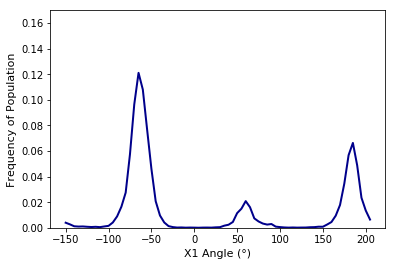

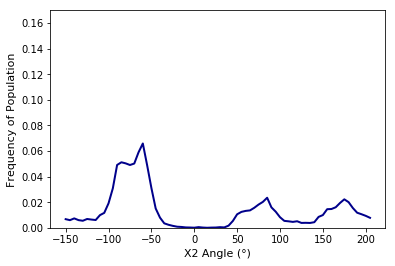

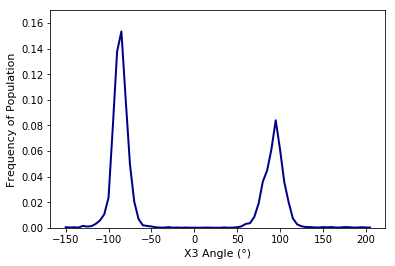

In [36]:
import collections
import operator

############################
# Round all five cystine X angles to nearest 5 degress
#############################
def custom_round(x, base=5):
    x = int(base * round(float(x)/base))
    
    ###############################################################################
    # To took at the distribution of angles at 180 degrees: We classify -150 to -180 as 180 - 210
    ###############################################################################
    if x < -150:
        x = x + 360
    return x

x1  = df['x1' ].apply(lambda x: custom_round(x, base=5)).tolist()
x1b = df['x1b'].apply(lambda x: custom_round(x, base=5)).tolist()
x2  = df['x2' ].apply(lambda x: custom_round(x, base=5)).tolist()
x2b = df['x2b'].apply(lambda x: custom_round(x, base=5)).tolist()
x3  = df['x3' ].apply(lambda x: custom_round(x, base=5)).tolist()

########################################
# Looking at total X angle distribution so combine X1 / X1B and X2 / X2B
########################################
x1 = x1 + x1b
x2 = x2 + x2b

#########################################################
# Use collections to counter the frequency of each angle
##########################################################

x1_frequency = collections.Counter(x1)
x2_frequency = collections.Counter(x2)
x3_frequency = collections.Counter(x3)

#########################################
# Sort dictionary in orderered fashion (smallest to largest)
###########################################
ordered_x1_frequency = sorted(x1_frequency.items(), key=operator.itemgetter(0))
ordered_x2_frequency = sorted(x2_frequency.items(), key=operator.itemgetter(0))
ordered_x3_frequency = sorted(x3_frequency.items(), key=operator.itemgetter(0))


################################
# Define each axis
################################
x1_axis = [(_[0]) for _ in ordered_x1_frequency]
x2_axis = [(_[0]) for _ in ordered_x2_frequency]
x3_axis = [(_[0]) for _ in ordered_x3_frequency]

#########################################################################
# Convert the number of angles to a frequency by dividing by total angles
#########################################################################
x1_frequency = [(float(_[1]) / float(len(x1))) for _ in ordered_x1_frequency]
x2_frequency = [(float(_[1]) / float(len(x2))) for _ in ordered_x2_frequency]
x3_frequency = [(float(_[1]) / float(len(x3))) for _ in ordered_x3_frequency]

##########################################
# Start to generate line graphs'
#########################################
import matplotlib.pyplot as plt
import numpy as np

print ordered_x1_frequency
#######################################
# Create X1 graph
#######################################
plt.plot(x1_axis,x1_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(u'X1 Angle (°)', fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes = plt.gca()
############################
# Set y_lim to be consistent with other graphs
############################
axes.set_ylim([0,0.17])
plt.show()

#############################
# Create X2 graph
#############################
plt.plot(x2_axis,x2_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(u'X2 Angle (°)', fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes = plt.gca()
axes.set_ylim([0,0.17])
plt.show()

###############################
# Creat X3 graph
###############################
plt.plot(x3_axis,x3_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(u'X3 Angle (°)', fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes =plt.gca()
axes.set_ylim([0,0.17])
plt.show()

#### Cystine dihedral distribution: Results
In agreement with previous analysis, can see that X1 adopts the 'Gauche-, Gauche+ and Trans' conformations with a very narrow distribution. Therefore defined as:
    Gauche+ (+60) = +30 to +90
    Gauche- (-60) = -90 to -30
    Trans   (180) = 150 to 210
    
X2 also adopts these conformations, however a greater distribution is observed. Therefore the following ranges were used for classificaiton
    Gauche+ (+60) = +30 to +120
    Gauche- (-60) = -120 to -30
    Trans   (180) = 150 to 210 

X3 angle distribution follows the previously identified 'Right Handed (+90)' or 'Left Handed (-90)'
        Right Handed (+90) =   +60 to +120
        Left Handed  (-90) =  -120 to -60


#### Frequency of Configurations: Intro
Based on the definitions above, there is a possible 90 configurations a cystine can adopt when considering all five X angles (X1, X2, X3, X2, X1).
Below calculates the frequency of those configurations
If a disulfide had a dihedral angle ouf of the defined ranges above it was excluded from analysis

In [37]:
import itertools
import os,sys
import shutil
import numpy
import math 

##########################################################
# GENERATE A LIST OF ALL 90 THEORETICAL CONFIGURATIONS
# X1 and X2 angles can be Gauche+, Gauche- or Trans
# X3 angles can be +90 or -90
# Over 90 theoretical configurations
# Store in a list as 'configurations'
#########################################################
a = 60
b = -60
c = 180
d = -90
e = 90

import string
exclude        = set(string.punctuation)
dihedralsx     = numpy.empty(shape=(5,1))
possible       = [[a,b,c],[a,b,c],[d,e],[a,b,c],[a,b,c]]
configurations = list(itertools.product(*possible))
unique         = []
for value in configurations:
      if value[::-1] in unique:
            continue
      unique.append(value)
configurations = unique

###############################################################
### Round all of the dihedral X angles to suitable conformation
# X1 angles are +/- 30 degrees of ,+60,-60 or 180
#                          +60 = +30 to +90
#                          -60 = -90 to -30 
#                          180 = 150 to 210
#
# X2 angles show more distribution (refer to previous figure) Therefore are:
#                          +60 = +30 to + 120
#                          -60 = -120 to -30
#                          180 =  150 to 210
#
# X3 angles are either +90 (Right Handed) or -90 (Left Handed)
#                          +90 = +60 to 120
#                          -90 = -120 to -60
################################################################


dihedrals = df[['x1','x2','x3','x2b','x1b']]

#################################################################
# Define the rounding functions and apply to angles
###################################################################
def x1_rounded(x1):
    x1 = float(x1)
    if (x1 <=  90) & (x1 >= 30):
        x1= 60
    if (x1 >= -90)  & (x1 <= -30):
        x1 = -60   
    if (x1 <=  180) & (x1 >= 150):
        x1= 180
    if (x1 >= -180) & (x1 <= -150):
        x1=180
    return(x1)

def x2_rounded(x2):
    x2 = float(x2)
    if (x2 <=  120) & (x2 >= 30):
        x2= 60
    if (x2 >= -120) & (x2 <= -30):
        x2 = -60   
    if (x2 <=  180) & (x2 >= 150):
        x2= 180
    if (x2 >= -180) & (x2 <= -150):
        x2=180
    return(x2)

def x3_rounded(x3):
    x3 = float(x3)
    if (x3  <=  120)  & (x3 >= 60):
        x3   = 90
    if (x3  >=  -120) & (x3 <= -60):
        x3   = -90
    return(x3)
        
df['x1' ]  = df['x1' ].apply(x1_rounded)
df['x1b']  = df['x1b'].apply(x1_rounded)
df['x2' ]  = df['x2' ].apply(x2_rounded)
df['x2b']  = df['x2b'].apply(x2_rounded)
df['x3' ]  = df['x3' ].apply(x3_rounded)

###########################################################################################
# Count the number of each configuration
# Have to consider assymetical configuraitons (x1,x2,x3,x2',x1' ==  x1',x2',x3,x2,1)
##############################################################################################

def configuration_count(config):
    config         = list(config)
    forward_config = len(df.loc[(df['x1'] == float(config[0])) & (df['x2'] == float(config[1]))  & (df['x3'] == float(config[2])) & (df['x2b'] == float(config[3]))& (df['x1b'] == float(config[4])) ]) #& df['x2'] == float(config[1])])
    
    ###########################################################################################
    # If configuration IS NOT symmetrical, have to consider the reverse order (Cys2 - Cys1)
    #############################################################################################
    if config != config[::-1]:
        reverse_config =  len(df.loc[(df['x1b'] == float(config[0])) & (df['x2b'] == float(config[1]))  & (df['x3'] == float(config[2])) & (df['x2'] == float(config[3]))& (df['x1'] == float(config[4])) ])
        forward_config = reverse_config + forward_config
    return(forward_config)

#####################################################################
# Separate configurations based on the x3 angle (either +90 or -90)
# Store in dictionary
########################################################################
plus_x3_configuration_dict  = {}
minus_x3_configuration_dict = {}
for config in configurations:
    if list(config)[2] == 90:
        plus_x3_configuration_dict[config] = configuration_count(config)
    if list(config)[2] == -90:
        minus_x3_configuration_dict[config] = configuration_count(config)
        
plus_x3_ordered_configuration  = sorted(plus_x3_configuration_dict.items(),  key=operator.itemgetter(0))
minus_x3_ordered_configuration = sorted(minus_x3_configuration_dict.items(), key=operator.itemgetter(0))

total_lefthanded = sum((item) for item in minus_x3_configuration_dict.values())
total_righhanded = sum((item) for item in plus_x3_configuration_dict.values())
total_disulfides = total_lefthanded + total_righhanded
print 'Total Number of Disulfides:',len(df)
print 'Total Number of Disulfides in Defined Configurations for Structural Analysis:',total_disulfides

Total Number of Disulfides: 18076
Total Number of Disulfides in Defined Configurations for Structural Analysis: 14674


#### Generate Configuration Frequency Graphs
Generate a 3D plot tha shows the frequency of population for each configuration

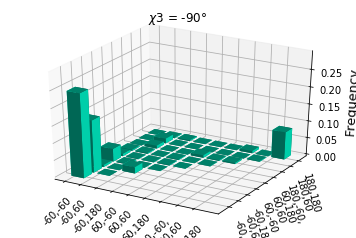

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline
##############################################################
# Two Figures:
#       fig  = x3 of -90
#       fig2 = x3 of +90
##############################################################

fig  = plt.figure()
#fig2 = plt.figure()
ax1  = fig.add_subplot(111, projection='3d' )
#ax2  = fig2.add_subplot(111, projection='3d')

#############################################################################################
# Define the positions on the grid for x-axis and y-axis to plot the frequency of configuraitons 
# (Half the diaganol grid)
##############################################################################################
xpos = []
ypos = []

i = 0
while i < 9:
    xpos = xpos + [i for _ in range(i,9)]
    ypos = ypos + [_ for _ in range(i,9)]
    i    = i +1
zpos = [0 for _ in range(len(minus_x3_ordered_configuration))]


num_elements = len(xpos)
dx           = np.ones(45)
dy           = np.ones(45)
dx           = [0.8 for _ in range(len(minus_x3_ordered_configuration))]
dy           = [0.8 for _ in range(len(minus_x3_ordered_configuration))]
minus_dz     = [_[1] for _ in minus_x3_ordered_configuration]
plus_dz      = [_[1] for _ in plus_x3_ordered_configuration]

#####################################################################################
# Convert dz from total number to frequency, by dividing by total number of disulfides 
# in defined configurations. Then set the axis limits based on the maximum frequency observed
# (know it will be in the minus_90 configurations)
#####################################################################################
minus_dz = [float(_)/float(total_disulfides) for _ in minus_dz]
plus_dz  = [float(_)/float(total_disulfides) for _ in plus_dz]
maximum_frequency = max(minus_dz)
ax1.set_zlim([0,maximum_frequency + 0.05])
#ax2.set_zlim([0,maximum_frequency + 0.05])


#################################
# Define x-tick and y-tick labels
#################################
xy_tick_labels = ["-60,-60","-60,60","-60,180","60,-60","60,60",'60,180','180,-60,',"180,60",'180,180']

ax1.set_title(r"$\chi$3 = -90$\degree$", loc = 'center')
ax1.set_zlabel("Frequency",fontsize = 13)


plt.xticks(np.arange(min(xpos), max(xpos)+1, 1.0),xy_tick_labels,rotation=45)
plt.yticks(np.arange(min(ypos)+0.5, max(ypos)+1, 1.0),xy_tick_labels,rotation=-75)















#ax2.set_title(r"$\chi$3 = +-90$\degree$", loc = 'center')
#ax2.set_zlabel("Frequency",fontsize = 13)
#ax1.set_xlabel(u"Cys 1 (X1,X2)(°)",fontsize = 10)




ax1.bar3d(xpos, ypos, zpos, dx, dy, minus_dz, color='#00ceaa')
#ax2.bar3d(xpos, ypos, zpos, dx, dy, plus_dz, color='#00ceaa')


### Ramachandran Plots of Individual Configurations

In [39]:
import math
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from Bio import PDB
from matplotlib import colors


###########################################################################
# Below function will create Ramachandran plots to show distribution of backbone angles
# The code is adapted from Peter Cock - https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/ramachandran/
# Code also adapted from PyRama - https://github.com/gerdos/PyRAMA
###########################################################################
rama_preferences = {
            "General": {
            "file": "./rama_data/pref_general.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF']),
            "bounds": [0, 0.0005, 0.02, 1],
        },
           "Second": {
            "file": "./rama_data/pref_general.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF']),
            "bounds": [0, 0.0005, 0.02, 1],
        }
    }
rama_pref_values = {}
for key, val in rama_preferences.items():
        rama_pref_values[key] = np.full((360, 360), 0, dtype=np.float64)
        with open(val["file"]) as fn:
            for line in fn:
                if not line.startswith("#"):
                    # Preference file has values for every second position only
                    rama_pref_values[key][int(float(line.split()[1])) + 180][int(float(line.split()[0])) + 180] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 179][int(float(line.split()[0])) + 179] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 179][int(float(line.split()[0])) + 180] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 180][int(float(line.split()[0])) + 179] = float(
                        line.split()[2])
normals = {}
outliers = {}
for key, val in rama_preferences.items():
        normals[key]  = {"x": [], "y": []}
        outliers[key] = {"x": [], "y": []}   
        
def ramachandran(cys1_phi,cys1_psi,cys2_phi,cys2_psi,config):
    """
    Main calculation and plotting definition
    :param file_name_list: List of PDB files to plot
    :return: Nothing
    """
    for idx, (key, val) in enumerate(sorted(rama_preferences.items(), key=lambda x: x[0].lower())):
        plt.subplot(1, 2, idx + 1)
        #plt.subplot(1,2,1)
        plt.imshow(rama_pref_values[key], cmap=rama_preferences[key]["cmap"],
                   norm=colors.BoundaryNorm(rama_preferences[key]["bounds"], rama_preferences[key]["cmap"].N),
                   extent=(-180, 180, 180, -180))
        if idx == 0:
            plt.scatter(cys1_phi, cys1_psi,s = 6)
        if idx ==1:
            plt.scatter(cys2_phi, cys2_psi,s = 6, color = 'red')
        plt.xlim([-180, 180])
        plt.ylim([-180, 180])
        plt.plot([-180, 180], [0, 0], color="black")
        plt.plot([0, 0], [-180, 180], color="black")
        plt.locator_params(axis='x', nbins=7)
        plt.xlabel(r'$\phi$')
        plt.ylabel(r'$\psi$')
        plt.grid()
        plt.title(config,size=10)
        plt.tight_layout()
    plt.show()

In [40]:
###########################################################################################
# The re_write columns is for the 'reverse configuraiton' dataframes
# where the config = x1b,x2b,x3,x2,x1
# By reversing the column names can easily then append to the forward dataframe for analysis
############################################################################################
def rewrite_columns(dataframe):
    dataframe.columns = dataframe.columns.str.replace("Cys2", "Cys3")
    dataframe.columns = dataframe.columns.str.replace("Cys1", "Cys2")
    dataframe.columns = dataframe.columns.str.replace("Cys3", "Cys1")
    return (dataframe)

###################################################################
# Function to return the pandas dataframe for the desired configuration
####################################################################

configuration_dataframe_dict = {}
def configuration_dataframe_return(config):
    config = list(config)
    forward_config = pd.DataFrame(columns = list(df))
    reverse_config = pd.DataFrame(columns = list(df))
    ##############################################################################################################
    # Forward Configuration:
    # Dihedrals are labelled as X1,X2,X3,X2b,X1b:
    # The forward configuration is when this order matches the configuration
    # For example: Config == -180,-60,-90,-60,-60: 
    # Search the database and get any cystine residues where we observe that configuration
    # However the reverse of the CONFIG: -60,-60,-90,-60,-180 is also the same:
    # Therefore have to search where X1b, X2B, X3, X2, X1 == Config
    #
    # IF THE CONFIGURATION IS IDENTICAL: -60,-60,-90,-60,-60 we do not search for the reverse configuration as then
    # the dataframe would be doubled
    ###############################################################################################################
    forward_config = (df.loc[
                        (df['x1' ] == float(config[0])) & 
                        (df['x2' ] == float(config[1])) & 
                        (df['x3' ] == float(config[2])) & 
                        (df['x2b'] == float(config[3])) & 
                        (df['x1b'] == float(config[4])) 
                       ])
    
    ###################################################################################
    # If the configuration IS NOT symmetrical, then search for the reverse configuration
    # x1b,x2b,x3,x2,x1
    ###################################################################################
    if config != config[::-1]:
        reverse_config = (df.loc[
                             (df['x1b'] == float(config[0])) & 
                             (df['x2b'] == float(config[1])) & 
                             (df['x3' ] == float(config[2])) & 
                             (df['x2' ] == float(config[3])) & 
                             (df['x1' ] == float(config[4])) 
                            ])
        ###############################################################################################
        # Apply the rewrite_columns function so Cys1 and Cys2 properties match with that of forward_config
        ################################################################################################
        reverse_config = rewrite_columns(reverse_config)

        #################################################################################
        # Append the two dataframes together
        #################################################################################
        forward_config = pd.concat([forward_config, reverse_config])
    
    return(forward_config)

for config in configurations:
    configuration_dataframe_dict[config] = configuration_dataframe_return(config)

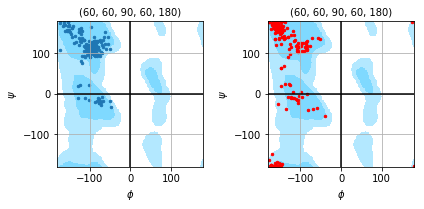

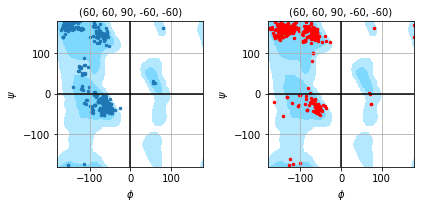

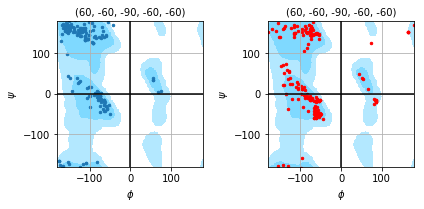

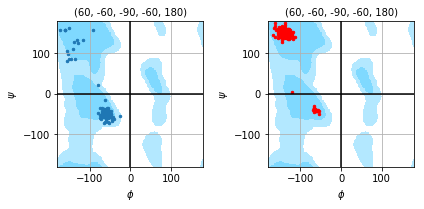

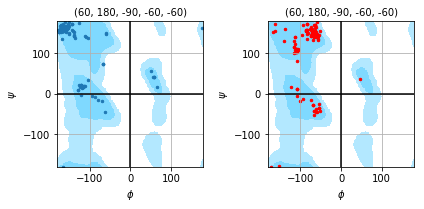

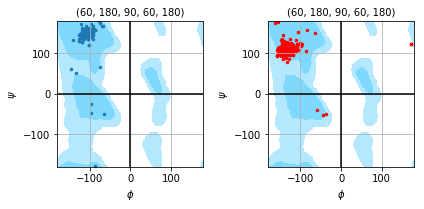

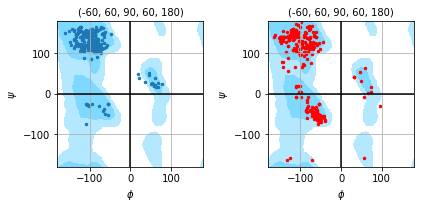

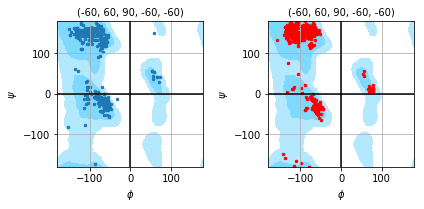

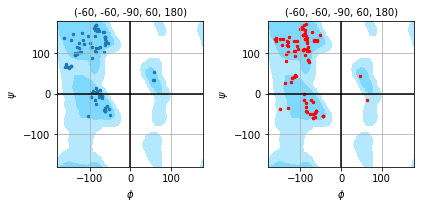

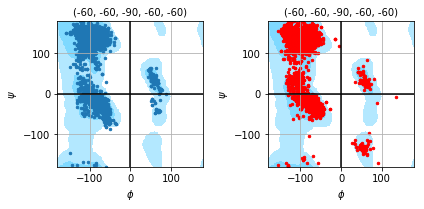

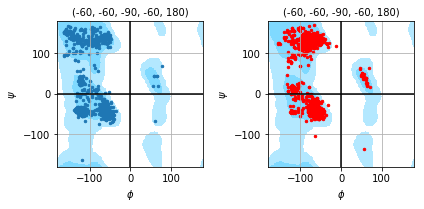

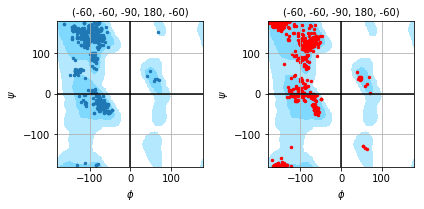

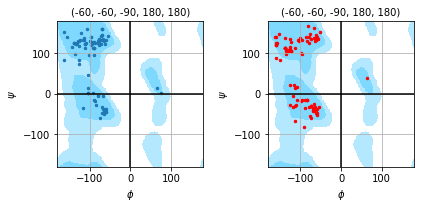

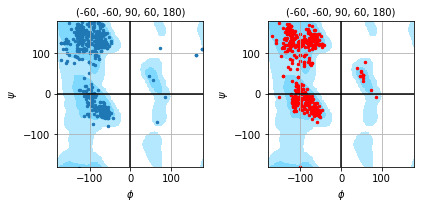

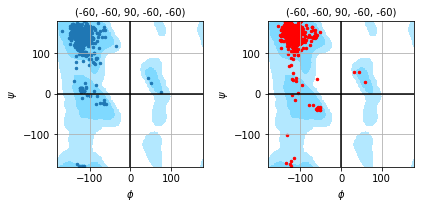

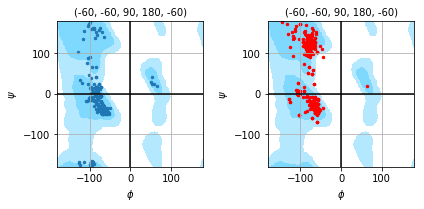

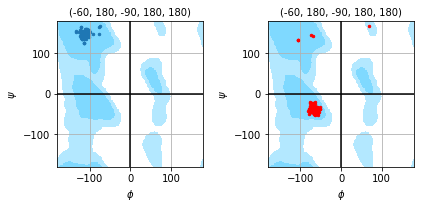

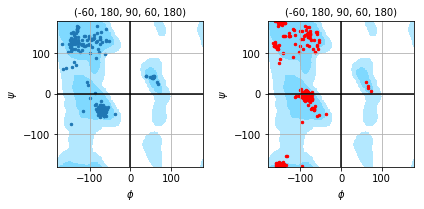

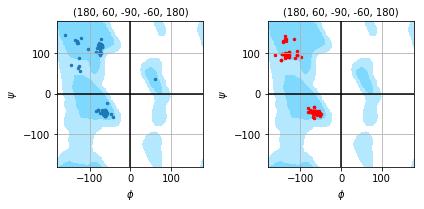

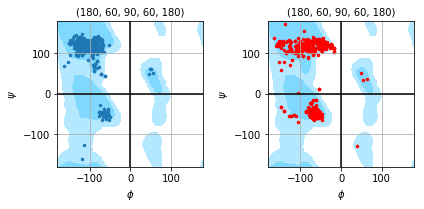

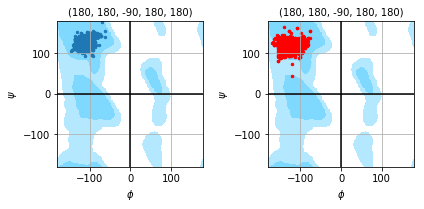

In [41]:
##########################################################################################
# Based on the configuration_dataframe function, generate a psi and phi list
######################################################################################
for config in configurations:
    #config_dataframe = configuration_dataframe_return(config)
    # Test if dictionary works first
    config_dataframe = configuration_dataframe_dict[config]
    cys1_phi_list    = config_dataframe['phi'  ].tolist() 
    cys1_psi_list    = config_dataframe['psi'  ].tolist() 
    cys2_phi_list    = config_dataframe['phi_x'].tolist()
    cys2_psi_list    = config_dataframe['psi_x'].tolist()

    if len(config_dataframe)> 75:
        ramachandran(cys1_phi_list,
                     cys1_psi_list,
                     cys2_phi_list,
                     cys2_psi_list,
                    config)

In [19]:
secondary_structure = [
'Helix',
'B-Bridge',
'Strand',
'3-Helix',
'5-Helix',
'Turn',
'Bend',
'Coil']


ss_x_axis = [
'Coil,Coil',
'B-Bridge,3-Helix',
'3-Helix,Bend',
'a-Helix,5-Helix',
'B-Bridge,Turn',
'a-Helix,Turn',
'Coil,3-Helix',
'Coil,Bend',
'B-Bridge,Coil',
'5-Helix,Coil',
'Turn,Bend',
'Bend,Bend',
'Bend,3-Helix',
'B-Bridge,Bend',
'Strand,Bend',
'a-Helix,a-Helix',
'Strand,Coil',
'Strand,3-Helix',
'Bend,Turn',
'Strand,a-Helix',
'Coil,Strand',
'3-Helix,a-Helix',
'Coil,a-Helix',
'3-Helix,Turn',
'a-Helix,Coil',
'a-Helix,Strand',
'Turn,Turn',
'B-Bridge,Strand',
'a-Helix,B-Bridge',
'5-Helix,5-Helix',
'B-Bridge,B-Bridge',
'5-Helix,Turn',
'5-Helix,Strand',
'3-Helix,B-Bridge',
'Bend,B-Bridge',
'Turn,Coil',
'Turn,a-Helix',
'Turn,3-Helix',
'Strand,B-Bridge',
'Bend,Strand',
'B-Bridge,a-Helix',
'5-Helix,a-Helix',
'Bend,Coil',
'Strand,Strand',
'Strand,Turn',
'Bend,a-Helix',
'Turn,Strand',
'Coil,B-Bridge',
'Coil,5-Helix',
'Coil,Turn',
'Turn,B-Bridge',
'a-Helix,3-Helix',
'3-Helix,Coil',
'3-Helix,3-Helix',
'Strand,5-Helix',
'3-Helix,Strand',
'a-Helix,Bend']


fig, ax = plt.subplots()
image = np.random.uniform(size=(10, 10))


fig.subplots_adjust(hspace=0.3, wspace=0.05)

def generate_ss_bar_graph(frequency_dict,config_total,config):
    y_pos = np.arange(len(ss_x_axis_top3))
    #plt.xticks(y_pos,ss_x_axis, rotation = 90)
    
    for key in frequency_dict:
        plt.bar(ss_x_axis_top3.index(key[0]),(float(key[1])/(float(config_total))), color = 'blue')
    plt.xticks(y_pos,ss_x_axis_top3, rotation = 90)
    plt.ylim(0,1)
    plt.title(config)
    plt.ylabel("Frequency")
    plt.xlabel('Cys1-Cys2 Secondary Structure')
    plt.show()
    
def classify_ss(ss):
    try:
        ss_category = ss_dict[ss]
    except KeyError:
        ss_category = ss_dict['C']
    return(ss_category)


for config in configurations:
    #config_dataframe = configuration_dataframe_return(config)
    # Test if dictionary works first
    config_dataframe = configuration_dataframe_dict[config]
    config_dataframe['cys1_ss_category'] = df['Cys1_SS'].apply(classify_ss)
    config_dataframe['cys2_ss_category'] = df['Cys2_SS'].apply(classify_ss)
    
    
    ss_list = config_dataframe[['cys1_ss_category','cys2_ss_category']]
    ss_list['combined'] = ss_list[['cys1_ss_category', 'cys2_ss_category']].apply(lambda x: ','.join(x), axis=1)
    if len(ss_list) > 100:
            common_ss = Counter(ss_list['combined'].tolist())
            common_ss = common_ss.most_common(3)
            generate_bar_ss_graph(common_ss, len(ss_list),config)
            

/Users/david/coding/lib/python2.7/site-packages/ipykernel_launcher.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/david/coding/lib/python2.7/site-packages/ipykernel_launcher.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/david/coding/lib/python2.7/site-packages/ipykernel_launcher.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

NameError: name 'Counter' is not defined

In [ ]:
####################################
# Create dataframe 
####################################


# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
num = 0

for config in configuration:
    num += 1
    
    plt.subplot(3,3,num)
    

In [38]:
from bokeh.plotting import figure, output_notebook, show
# from bokeh import Bar, output_file, show
# from bokeh.charts.attributes import cat
from numpy import cos, linspace
from collections import Counter,OrderedDict

amino_acids=['L','A','G','S','V','E','I','R','T','D','K','P','N','F','Q','Y','M','H','W','C']
#------------------------------------#------------------------------------
#NATIVE AMINO ACID FREQUENCY
#------------------------------------#------------------------------------
native_amino_freq=[]

#Save native frequencies into a dictionary (frequency_dict)
get=open('./amino_acid_frequency.txt','r')
frequency_dict={}
for line in get:
	lines=line.split(',')
	frequency_dict[lines[0]]=float(lines[1])
get.close()

#------------------------------------#------------------------------------
#Go through the ordered amino acids list and append frequncy to native amino
#freq in the correct order
#------------------------------------#------------------------------------
for residue in amino_acids:
	native_amino_freq.append(frequency_dict[residue])

    
    
    
##################################
###########################
###################################3
##################################
#######################################



def configuration_count(config):
    #print config
    reverse_config = []
    forward_config = []
    config = list(config)
    cys1_phi_list = []
    cys2_phi_list = []
    cys1_psi_list = []
    cys2_psi_list = []   
    
    forward_config =    (df.loc[(df['x1'] == float(config[0])) & 
                             (df['x2'] == float(config[1])) & 
                             (df['x3'] == float(config[2])) & 
                             (df['x2b'] == float(config[3]))& 
                             (df['x1b'] == float(config[4])) 
                            ])
    

    if config == config[::-1]:
    
        cys1_phi_list = forward_config['phi'].tolist() 
        cys1_psi_list = forward_config['psi'].tolist() 
        cys2_phi_list = forward_config['phi_x'].tolist()
        cys2_psi_list = forward_config['psi_x'].tolist()


    
    if config != config[::-1]:
        reverse_config = (df.loc[(df['x1b'] == float(config[0])) & 
                             (df['x2b'] == float(config[1])) & 
                             (df['x3'] == float(config[2])) & 
                             (df['x2'] == float(config[3]))& 
                             (df['x1'] == float(config[4])) 
                            ])  


    
    
    if len(forward_config) + len(reverse_config) > 400:
        print config ,len(forward_config) + len(reverse_config)
        before_residue_list = forward_config['Cys1_before_residue'].tolist()
        after_residue_list =  forward_config['Cys1_after_residue'].tolist()
        
        if config != config[::-1]:
            before_residue_list = before_residue_list + reverse_config['Cys2_before_residue'].tolist()
            after_residue_list = after_residue_list + reverse_config['Cys2_after_residue'].tolist()           
        #before_residue_list = before_residue_list + forward_config['Cys2_before_residue'].tolist()
        print len(before_residue_list)
        
        #+reverse_config['Cys2_before_residue'].tolist()
#         after_residue_list =  forward_config['Cys1_after_residue'].tolist()  +reverse_config['Cys2_after_residue'].tolist()

        before_residue_list =['C' if x=='c' else x for x in before_residue_list]
        after_residue_list  =['C' if x=='c' else x for x in after_residue_list]

        total=len(before_residue_list)
        print total
        #print config, total
        counts_before=Counter(before_residue_list)
        counts_after=Counter(after_residue_list)


        for key, value in counts_before.items():
            x=float(value) / float(total)
            counts_before[key] = x
        for key, value in counts_after.items():
            counts_after[key] = float(value) / float(total)



        y_list_before=[]
        y_list_after=[]
        for value in amino_acids:
            y_list_before.append((counts_before[value]))
            y_list_after.append(counts_after[value])

        #print len(y_list_before)
#         x_range=range(0,20)
        x_range = np.arange(0.5,20.5,1)

        #print x_range
        p = figure(plot_width=600, plot_height=400,x_range=amino_acids, title = str(config), y_range = (0.0,0.6))
        #p.multi_line([x_range,x_range,x_range],[y_list_before,y_list_after,native_amino_freq],color=["darkmagenta", "mediumblue","black"], alpha=[0.9, 0.9,0.5], line_width=3)
        #p.multi_line([x_range,x_range],[y_list_before,y_list_after],color=["darkmagenta", "mediumblue"], alpha=[0.9, 0.9], line_width=3, legend=["before",'after'])
                  
        p.line(x_range,y_list_before,color="darkmagenta",alpha=0.9,line_width=3)#,legend='before')
        p.line(x_range,y_list_after,color="mediumblue",alpha=0.9,line_width=3)#,legend='after')
        p.line(x_range,native_amino_freq,color="black",alpha=0.9,line_dash=[6,3],line_width=3)#,legend='native')
        #p.legend.orientation = "left_top"
        #p.legend.location = "bottom_left"
        #p.legend.orientation="horizontal"
        #p.title = str(config)
        p.yaxis.axis_label = "Frequency"
        p.xaxis.axis_label = "Amino Acid"
        p.xaxis.major_label_text_font_size = '12pt'
        p.yaxis.major_label_text_font_size = '12pt'
        p.yaxis.axis_label_text_font_size  = '13pt'
        p.xaxis.axis_label_text_font_size  = '13pt'
        show(p)

for config in configurations:
      (configuration_count(config))

[60, 60, 90, -60, -60] 801
801
801
[-60, 60, 90, -60, -60] 623
623
623
[-60, -60, -90, -60, -60] 3613
3613
3613
[-60, -60, -90, -60, 180] 2260
2260
2260
[-60, -60, -90, 180, -60] 563
563
563
[-60, -60, 90, 60, 180] 618
618
618
[-60, -60, 90, -60, -60] 824
824
824
[-60, 180, 90, 60, 180] 661
661
661
[180, 60, 90, 60, 180] 525
525
525
[180, 180, -90, 180, 180] 1205
1205
1205
